Generating 3000 normal and 500 anomalous data points...
Data generation complete.


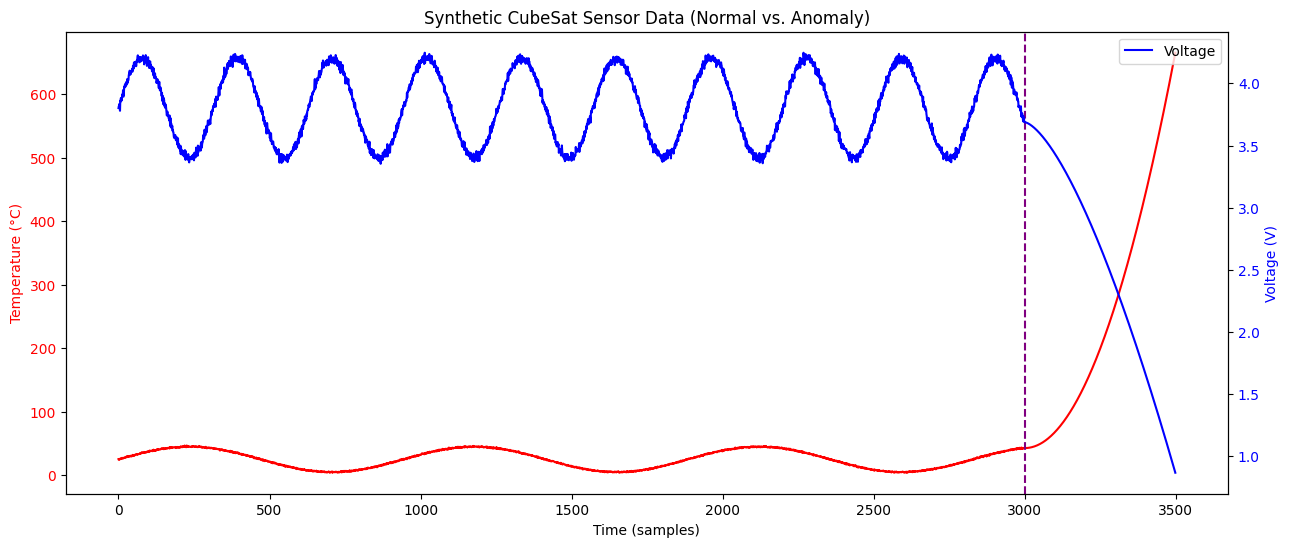


Starting data preprocessing for time-series model...
Created 3470 sequences of length 30.
Training data shape: (2776, 30, 2)
Testing data shape: (694, 30, 2)
Preprocessing complete. Data is ready for model training.


In [ ]:
# KAGGLE NOTEBOOK - CELL 1


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def generate_guardian_data(n_samples_normal=3000, n_samples_anomaly=500):

    time_normal = np.arange(n_samples_normal)
    temp_normal = 20 * np.sin(time_normal / 150) + 25
    volt_normal = 0.4 * np.sin(time_normal / 50) + 3.8

    temp_normal += np.random.normal(0, 0.5, n_samples_normal)
    volt_normal += np.random.normal(0, 0.02, n_samples_normal)

    labels_normal = np.zeros(n_samples_normal)


    time_anomaly = np.arange(n_samples_anomaly)

    temp_anomaly_start = temp_normal[-1]
    temp_anomaly = temp_anomaly_start + (time_anomaly / 20)**2

    volt_anomaly_start = volt_normal[-1]
    volt_anomaly = volt_anomaly_start - (time_anomaly / 250)**1.5

    labels_anomaly = np.ones(n_samples_anomaly)

    temperatures = np.concatenate([temp_normal, temp_anomaly])
    voltages = np.concatenate([volt_normal, volt_anomaly])
    labels = np.concatenate([labels_normal, labels_anomaly])

    df = pd.DataFrame({
        'temperature': temperatures,
        'voltage': voltages,
        'label': labels
    })

    print("Data generation complete.")
    return df


df = generate_guardian_data()
df.to_csv('cubesat_sensor_data.csv', index=False)
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Temperature (C)', color='red')
ax1.plot(df.index, df['temperature'], color='red', label='Temperature')
ax1.tick_params(axis='y', labelcolor='red')
ax1.axvline(x=3000, color='purple', linestyle='--', label='Anomaly Start')

ax2 = ax1.twinx()
ax2.set_ylabel('Voltage (V)', color='blue')
ax2.plot(df.index, df['voltage'], color='blue', label='Voltage')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Synthetic CubeSat Sensor Data (Normal vs. Anomaly)')
plt.legend()
plt.show()

scaler = MinMaxScaler()
feature_data = df[['temperature', 'voltage']].values
scaled_features = scaler.fit_transform(feature_data)

labels = df['label'].values
SEQUENCE_LENGTH = 30

def create_sequences(features, labels, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:(i + sequence_length)])
        y.append(labels[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, labels, SEQUENCE_LENGTH)

print(f"Created {len(X)} sequences of length {SEQUENCE_LENGTH}.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Building and training the LSTM model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 8)              │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7472 - loss: 0.6040 - val_accuracy: 0.9173 - val_loss: 0.3281
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9349 - loss: 0.2904 - val_accuracy: 0.9622 - val_loss: 0.1889
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9686 - loss: 0.1832 - val_accuracy: 0.9532 - val_loss: 0.2040
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9622 - loss: 0.1850 - val_accuracy: 0.9640 - val_loss: 0.1562
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9474 - loss: 0.1709 - val_accuracy: 0.9622 - val_loss: 0.1521
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9705 - loss: 0.1457 - val_accuracy: 0.9712 - val_loss: 0.1466
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9766 - loss: 0.1237 - val_accuracy: 0.9640 - val_loss: 0.1382
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9732 - loss: 0.1238 - val_accuracy: 0.9640 - v

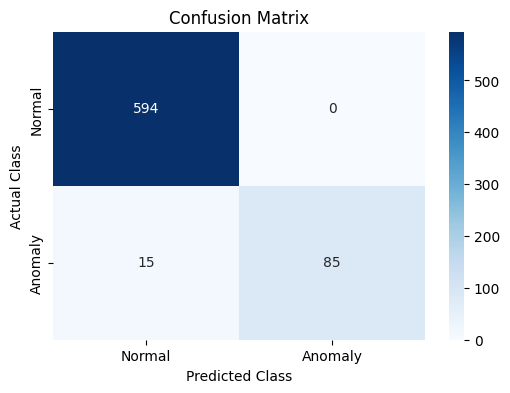


Starting model conversion to TensorFlow Lite with quantization...
Saved artifact at '/tmp/tmpe0nipoft'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 2), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136828303355024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136828303359824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136828303357904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136828303359632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136828265012240: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(



Conversion complete. Quantized model size: 15.84 KB

Generating C++ header file: model_data.h
--------------------------------------------------
COPY AND PASTE THE FOLLOWING CODE INTO A NEW FILE NAMED 'model_data.h' IN YOUR ARDUINO PROJECT:
--------------------------------------------------
#ifndef GUARDIAN_MODEL_DATA_H
#define GUARDIAN_MODEL_DATA_H

// TensorFlow Lite model, quantized and converted for the Guardian project.
// Model size: 15.84 KB

unsigned const char g_guardian_model_data[] = {
0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00
, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00
, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00
, 0x8c, 0x00, 0x00, 0x00, 0x04, 0x01, 0x00, 0x00, 0x84, 0x06, 0x00, 0x00
, 0x94, 0x06, 0x00, 0x00, 0x30, 0x3d, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00
, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x9e, 0xd5, 0xff, 0xff
, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00,

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("\nBuilding and training the LSTM model...")

model = Sequential([
    LSTM(8, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("\nEvaluating model performance...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly']))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
print("\nStarting model conversion to TensorFlow Lite with quantization...")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False

converter.optimizations = [tf.lite.Optimize.DEFAULT]
def representative_dataset():
    for i in range(100):
        yield [X_train[i:i+1].astype(np.float32)]
converter.representative_dataset = representative_dataset


tflite_model_quant = converter.convert()
model_size_kb = len(tflite_model_quant) / 1024
print(f"\nConversion complete. Quantized model size: {model_size_kb:.2f} KB")
print("\nGenerating C++ header file: model_data.h")
def hex_to_c_array(hex_data, var_name):
    c_str = ''
    c_str += '#ifndef GUARDIAN_MODEL_DATA_H\n'
    c_str += '#define GUARDIAN_MODEL_DATA_H\n\n'
    c_str += f'// TensorFlow Lite model, quantized and converted for the Guardian project.\n'
    c_str += f'// Model size: {model_size_kb:.2f} KB\n\n'
    c_str += f'unsigned const char {var_name}[] = {{\n'
    hex_array = []
    for i, val in enumerate(hex_data):
        hex_str = format(val, '#04x')
        if (i + 1) % 12 == 0:
            hex_str += '\n'
        hex_array.append(hex_str)
    c_str += ', '.join(hex_array)
    c_str += '\n};\n\n'
    c_str += f'unsigned int {var_name}_len = {len(hex_data)};\n\n'
    c_str += '#endif // GUARDIAN_MODEL_DATA_H\n'
    return c_str

c_model_str = hex_to_c_array(tflite_model_quant, 'g_guardian_model_data')

with open('model_data.h', 'w') as f:
    f.write(c_model_str)

print("-" * 50)
print("COPY AND PASTE THE FOLLOWING CODE INTO A NEW FILE NAMED 'model_data.h' IN YOUR ARDUINO PROJECT:")
print("-" * 50)
print(c_model_str)
print("-" * 50)

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math

nsn=3000
nsa=500
tl = 20 * np.sin(np.arange(nsn) / 150) + 25
vn= 0.4 * np.sin(np.arange(nsn) / 50) + 3.8
tl += np.random.normal(0, 0.5, nsn)
vn+= np.random.normal(0, 0.02, nsn)
ta = np.arange(nsa)
tas = tl[-1]
ta = tas + (ta / 20)*(ta / 20)
vas = vn[-1]
va = vas - math.sqrt(ta / 250)
la = np.ones(nsa)
temperatures = np.concatenate([tl, ta])
voltages = np.concatenate([vn, va])
labels = np.concatenate([np.zeros(nsn), la])
df = pd.DataFrame({
        'temperature': temperatures,
        'voltage': voltages,
        'label': labels
    })
df.to_csv('cubesat_sensor_data.csv', index=False)
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.plot(df.index, df['temperature'], color='red', label='Temperature')
ax1.tick_params(axis='y', labelcolor='red')
ax1.axvline(x=3000, color='purple', linestyle='--', label='Anomaly Start')
ax2 = ax1.twinx()
ax2.set_ylabel('Voltage (V)', color='blue')
ax2.plot(df.index, df['voltage'], color='blue', label='Voltage')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Synthetic CubeSat Sensor Data (Normal vs. Anomaly)')
plt.legend()
plt.show()

scaler = MinMaxScaler()
fdata = df[['temperature', 'voltage']].values
scaled_features = scaler.fit_transform(fdata)
labels = df['label'].values

SEQUENCE_LENGTH = 30

def create_sequences(features, labels, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:(i + sequence_length)])
        y.append(labels[i + sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, labels, SEQUENCE_LENGTH)

print("Created ",len(X)," sequences of length ",SEQUENCE_LENGTH,".")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)